In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
cols= confirmed_df.keys()
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35


In [4]:
%matplotlib inline

#comparing India, Japan , US on last 2 days and all days
cmp_be=confirmed_df.loc[:,['Country/Region','3/27/20','3/28/20']]
%pylab
figsize(16, 9)
plt.figure(figsize(16,9))
#ax = cmp_be.plot.bar(x='Country/Region', y=['1/22/20','3/28/20'], rot=0)
cmp_be.loc[(cmp_be['Country/Region']== 'India') | (cmp_be['Country/Region'] == 'Japan') | (cmp_be['Country/Region'] == 'US') ].plot.bar()
confirmed_df.loc[(confirmed_df['Country/Region']== 'India') | (confirmed_df['Country/Region'] == 'Japan') | (confirmed_df['Country/Region'] == 'US') ].plot.bar()
%matplotlib inline


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


F:\SETUP\ANACONDA\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
137            NaN          Italy  43.0000  12.0000        0        0   
225            NaN             US  37.0902 -95.7129        1        1   

     1/24/20  1/25/20  1/26/20  1/27/20   ...     4/23/20  4/24/20  4/25/20  \
137        0        0        0        0   ...      189973   192994   195351   
225        2        2        5        5   ...      869170   905358   938154   

     4/26/20  4/27/20  4/28/20  4/29/20  4/30/20   5/1/20   5/2/20  
137   197675   199414   201505   203591   205463   207428   209328  
225   965785   988197  1012582  1039909  1069424  1103461  1132539  

[2 rows x 106 columns]
         131  137  201  225
1/22/20    0    0    0    1
1/23/20    0    0    0    1
1/24/20    0    0    0    2
1/25/20    0    0    0    2
1/26/20    0    0    0    5


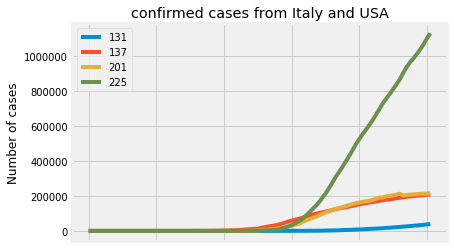

<Figure size 1152x648 with 0 Axes>

In [10]:

%matplotlib inline

#cmp_be1 = confirmed_df.loc[(confirmed_df['Country/Region']=='Russia')|(confirmed_df['Country/Region']=='US'),'1/22/20':'4/30/20']
print(confirmed_df.loc[confirmed_df['Country/Region'].isin(['Italy','US'])])
#cmp_be1=confirmed_df.loc[confirmed_df['Country/Region'].isin(['Italy','US'])]
cmp_be1 = confirmed_df.loc[(confirmed_df['Country/Region']=='Italy')|(confirmed_df['Country/Region']=='US')|(confirmed_df['Country/Region']=='Spain')|(confirmed_df['Country/Region']=='India'),'1/22/20':'5/2/20']
cmp_be1.head()
#cmp_be1 = cmp_be1.set_index('Country/Region').T
#df = cmp_be1.set_index('Country/Region').T.rename_axis('Country/Region').rename_axis(None, 1)
df = cmp_be1.transpose()
#cmp_be1.transpose().reset_index().rename(columns={'index':'Variable'})
print (df.head())
#df.index = df.index.map(int)
df.plot(kind='line')
#df.groupby("Country/Region")['unemployment'].mean().plot(kind='bar')
plt.title('confirmed cases from Italy and USA')
plt.ylabel('Number of cases')
#plt.xlabel('dates')
plt.figure(figsize(16,9))
plt.show()


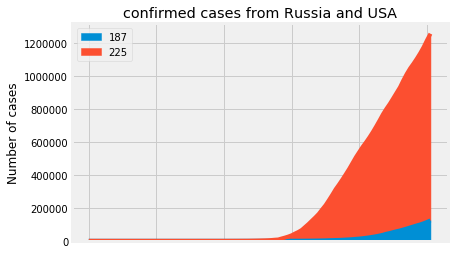

<Figure size 1152x648 with 0 Axes>

In [12]:

%matplotlib inline

cmp_be1 = confirmed_df.loc[(confirmed_df['Country/Region']=='Russia')|(confirmed_df['Country/Region']=='US'),'1/22/20':'5/2/20']
#cmp_be1.head()
df = cmp_be1.transpose()
df.head()
#df.index = df.index.map(int)
df.plot(kind='area')
plt.title('confirmed cases from Russia and USA')
plt.ylabel('Number of cases')
#plt.xlabel('dates')
plt.figure(figsize(16,9))
plt.show()


In [14]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,0,0,0,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,0,0,0,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,0,0,0,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,0,0,0,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,0,0,0,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35


In [15]:

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
japan_cases = [] 
india_cases = [] 
korea_cases=[]
russia_cases=[]
israel_cases=[]
canada_cases=[]



for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    print (confirmed_sum)
        # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    japan_cases.append(confirmed_df[confirmed_df['Country/Region']=='Japan'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    korea_cases.append(confirmed_df[confirmed_df['Country/Region']=='Korea, South'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    israel_cases.append(confirmed_df[confirmed_df['Country/Region']=='Israel'][i].sum())
    canada_cases.append(confirmed_df[confirmed_df['Country/Region']=='Canada'][i].sum())

    

555
654
941
1434
2118
2927
5578
6166
8234
9927
12038
16787
19881
23892
27635
30794
34391
37120
40150
42762
44802
45221
60368
66885
69030
71224
73258
75136
75639
76197
76819
78572
78958
79561
80406
81388
82746
84112
86011
88369
90306
92840
95120
97886
101801
105847
109821
113590
118620
125875
128352
145219
156116
167466
181603
197113
214846
242616
272247
304555
337018
378282
418079
467723
529701
593423
660824
720285
782490
857608
932638
1013458
1095876
1176059
1249737
1321427
1396438
1480200
1565538
1657929
1736025
1835164
1905192
1975581
2055506
2151872
2239723
2317339
2400894
2471847
2549175
2624741
2708547
2795875
2881140
2955033
3023722
3097190
3172287
3256853
3343777
3427343


INDIA CASES:


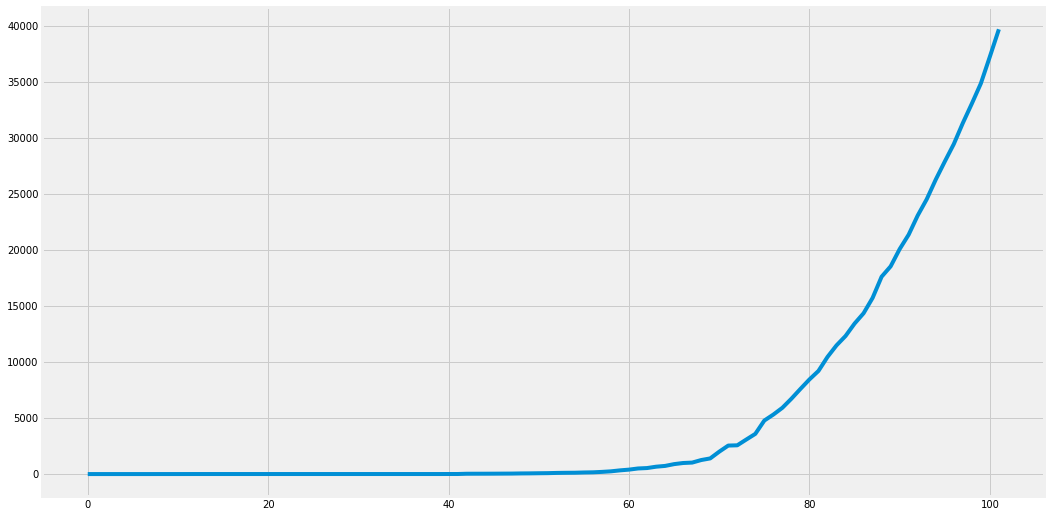

In [16]:
plot(india_cases)
print("INDIA CASES:")

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3094, 4011, 3743, 3159, 3597, 2729, 3030, 2612, 2040, 419, 15147, 6517, 2145, 2194, 2034, 1878, 503, 558, 622, 1753, 386, 603, 845, 982, 1358, 1366, 1899, 2358, 1937, 2534, 2280, 2766, 3915, 4046, 3974, 3769, 5030, 7255, 2477, 16867, 10897, 11350, 14137, 15510, 17733, 27770, 29631, 32308, 32463, 41264, 39797, 49644, 61978, 63722, 67401, 59461, 62205, 75118, 75030, 80820, 82418, 80183, 73678, 71690, 75011, 83762, 85338, 92391, 78096, 99139, 70028, 70389, 79925, 96366, 87851, 77616, 83555, 70953, 77328, 75566, 83806, 87328, 85265, 73893, 68689, 73468, 75097, 84566, 86924, 83566]


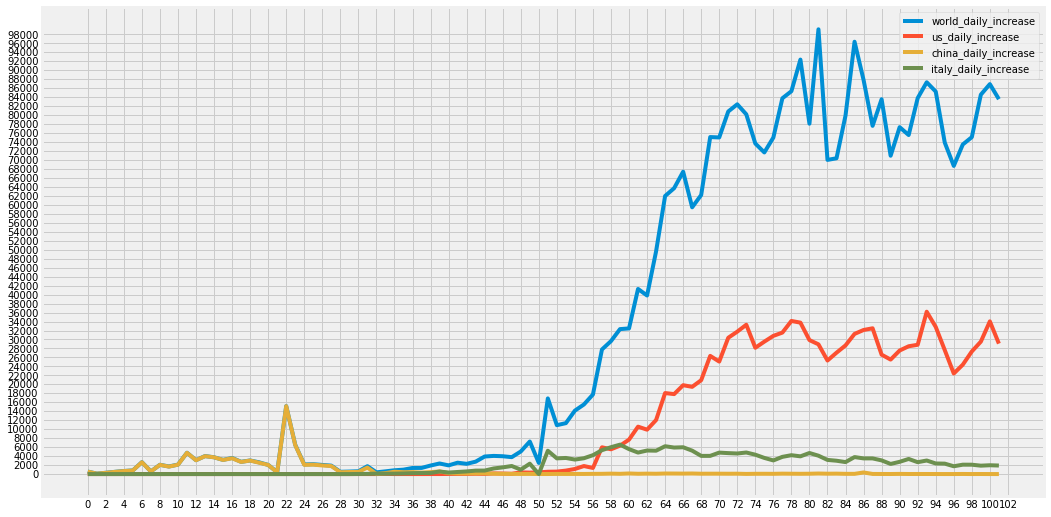

In [17]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
japan_daily_increase = daily_increase(japan_cases)
india_daily_increase = daily_increase(india_cases)
korea_daily_increase = daily_increase(korea_cases)
russia_daily_increase = daily_increase(russia_cases)
israel_daily_increase = daily_increase(israel_cases)
canada_daily_increase = daily_increase(canada_cases)
print (world_daily_increase)
plt.plot(world_daily_increase)
plt.plot(us_daily_increase)
plt.plot(china_daily_increase)
plt.plot(italy_daily_increase)
plt.legend(['world_daily_increase', 'us_daily_increase','china_daily_increase','italy_daily_increase'])
plt.yticks(np.arange(0, max(world_daily_increase)+1, 2000))
plt.xticks(np.arange(0, len(world_cases)+1, 2))
plt.show()

In [18]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
#world_cases.ndim

([<matplotlib.axis.YTick at 0x206e2db3f28>,
 <a list of 57 Text yticklabel objects>)

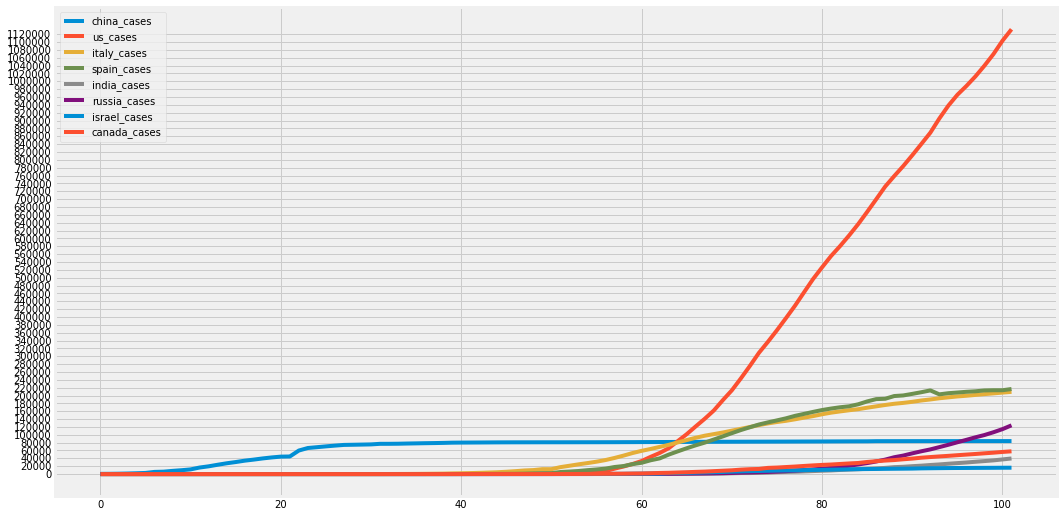

In [19]:
plt.plot(china_cases)
plt.plot(us_cases)
plt.plot(italy_cases)
plt.plot(spain_cases)
plt.plot(india_cases)
plt.plot(russia_cases)
plt.plot(israel_cases)
plt.plot(canada_cases)
plt.legend(['china_cases', 'us_cases','italy_cases','spain_cases','india_cases','russia_cases','israel_cases','canada_cases'])
plt.yticks(np.arange(0, max(us_cases)+1, 20000))

In [20]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
#print(future_forcast)
adjusted_dates = future_forcast[:-10]
#print(adjusted_dates)

In [21]:
start = '2/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
#print(future_forcast_dates)    

In [22]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=True)
#print ("X_train: ", X_train_confirmed)
#print ("y_train: ", y_train_confirmed)
#print("X_test: ", X_test_confirmed)
#print ("y_test: ", y_test_confirmed)

In [23]:
#svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.05, epsilon=1,degree=8, C=0.05)
#svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
#svm_pred = svm_confirmed.predict(future_forcast)
#print(future_forcast,svm_pred)

In [24]:
# check against testing data
#svm_test_pred = svm_confirmed.predict(X_test_confirmed)
#plt.plot(y_test_confirmed)
#plt.plot(svm_test_pred)
#plt.legend(['Test Data', 'SVM Predictions'])
#print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [25]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)
#print(poly_X_train_confirmed)
#print(poly_X_test_confirmed)
#print(poly_future_forcast)


In [26]:

# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 21833.611455133712
MSE: 599593669.2832812


In [27]:
print(linear_model.coef_)
print(test_linear_pred)


[[ 4.89750373e+04 -2.87475842e+04  3.47434638e+03 -1.40914733e+02
   2.43816321e+00 -1.75909603e-02  4.44085163e-05]]
[[ 3.47214097e+05]
 [ 1.04957483e+05]
 [ 1.61828336e+06]
 [ 1.45223221e+06]
 [-2.40489916e+04]
 [ 3.19052370e+06]
 [-1.46720829e+03]
 [ 9.26977189e+05]
 [ 4.33466734e+04]
 [ 7.97170502e+05]
 [ 9.18547998e+04]]


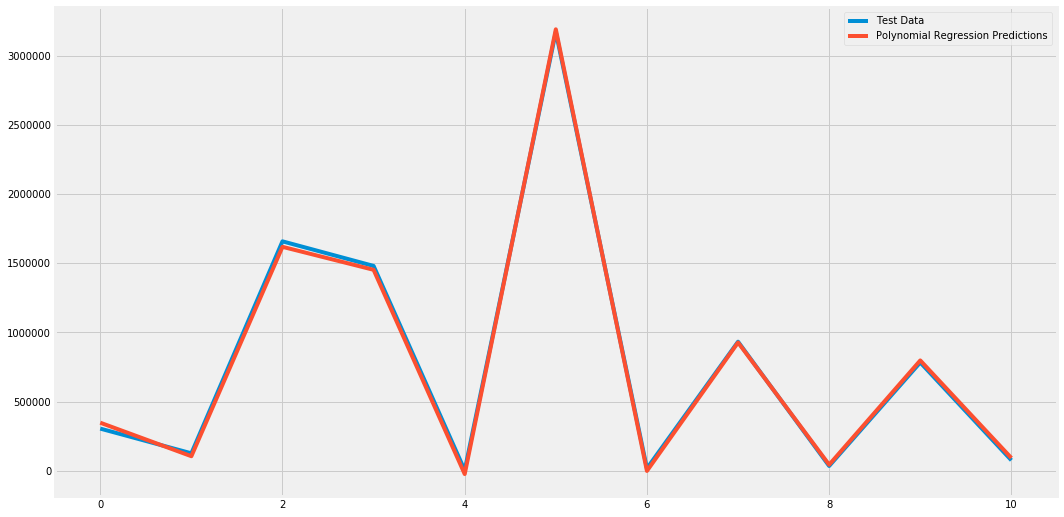

In [28]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [29]:
#Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

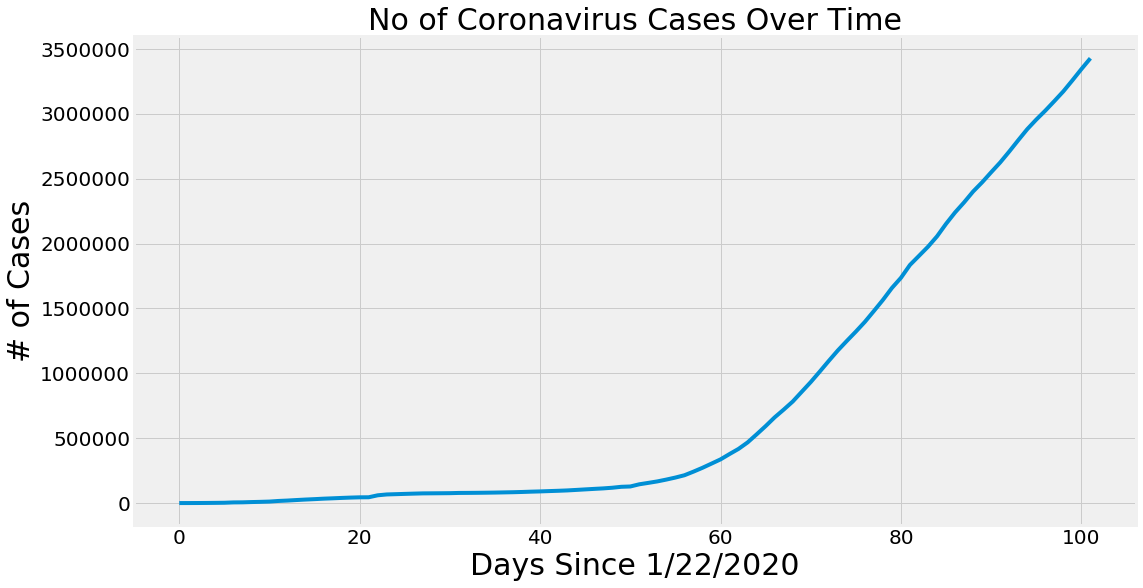

In [30]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('No of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

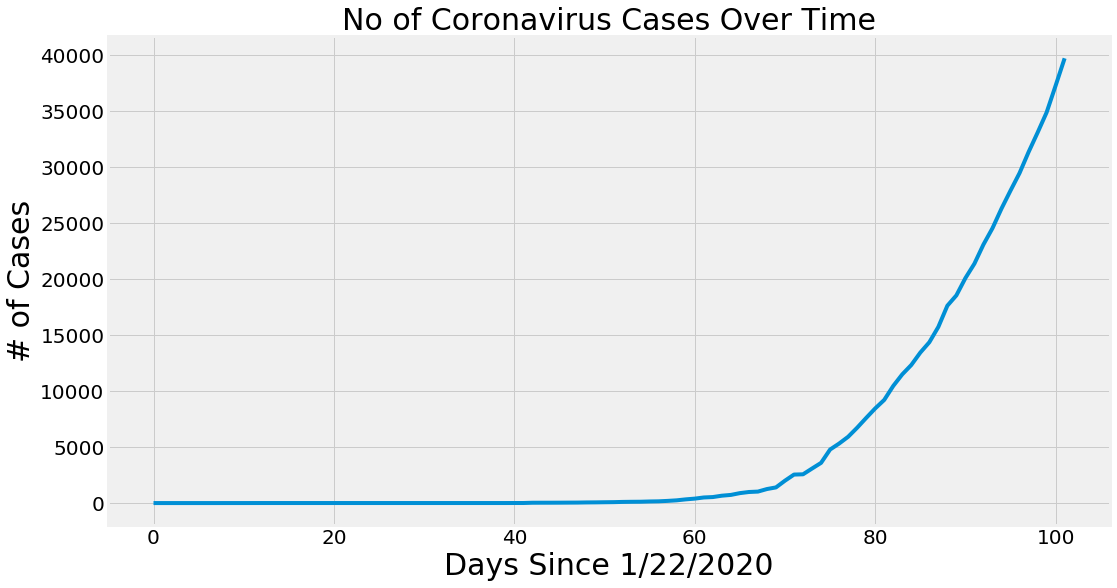

In [31]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases)
plt.title('No of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

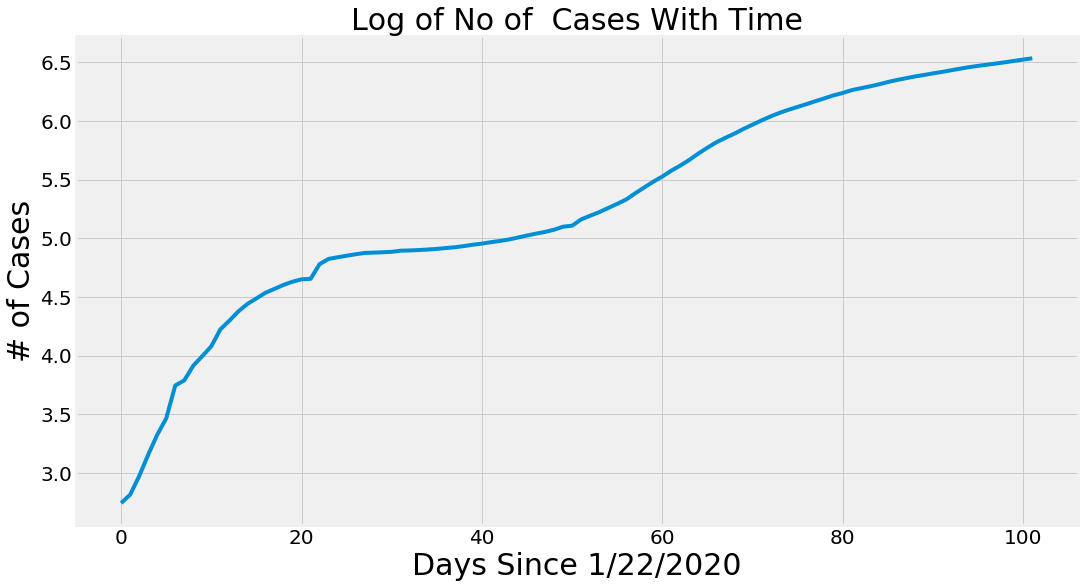

In [32]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of No of  Cases With Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]


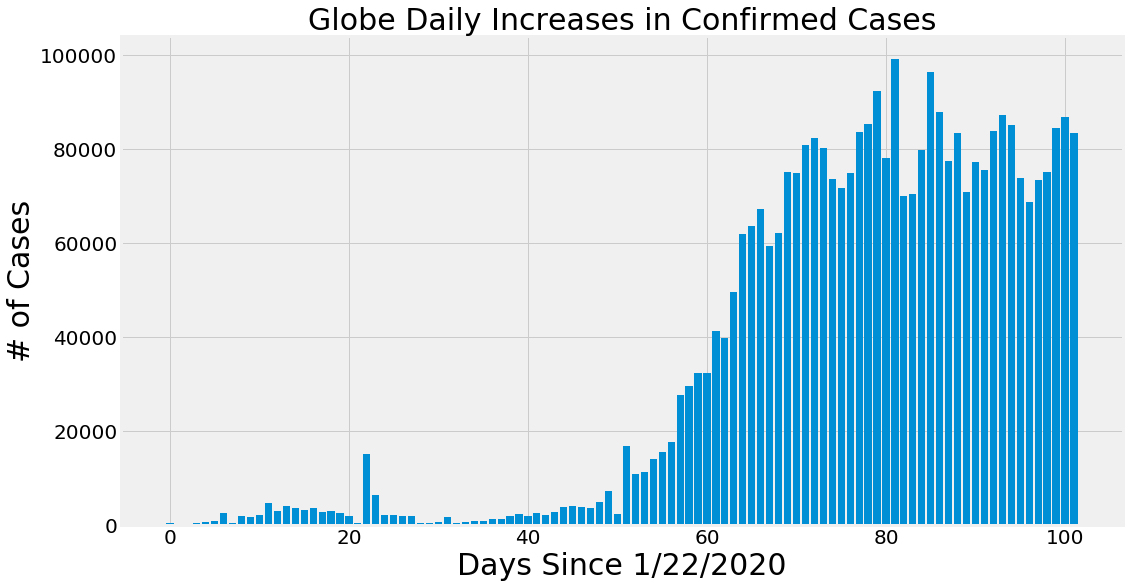

In [33]:
print(adjusted_dates)
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('Globe Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

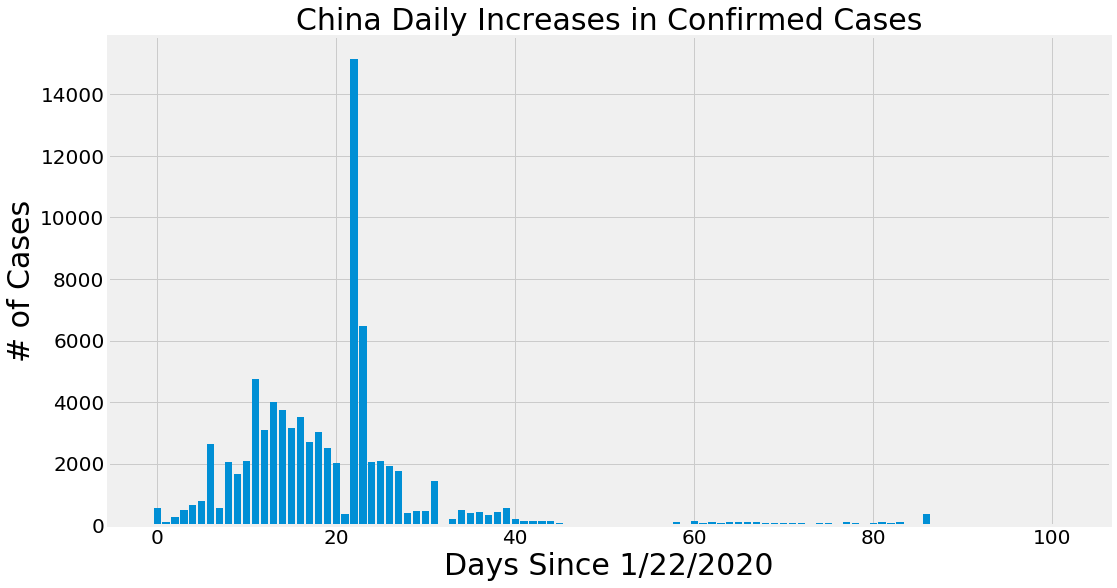

In [34]:

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

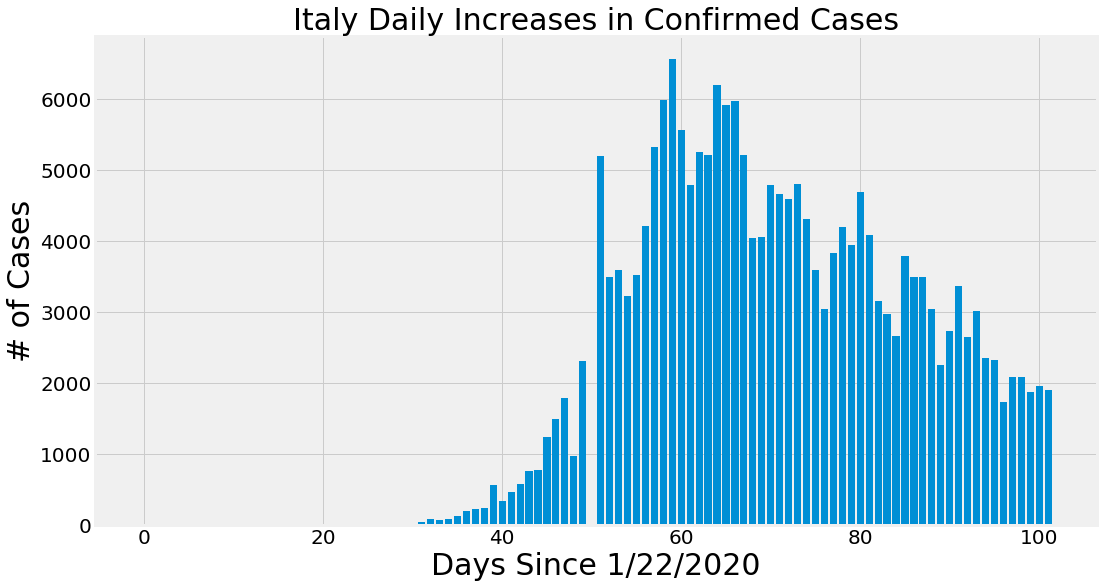

In [35]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

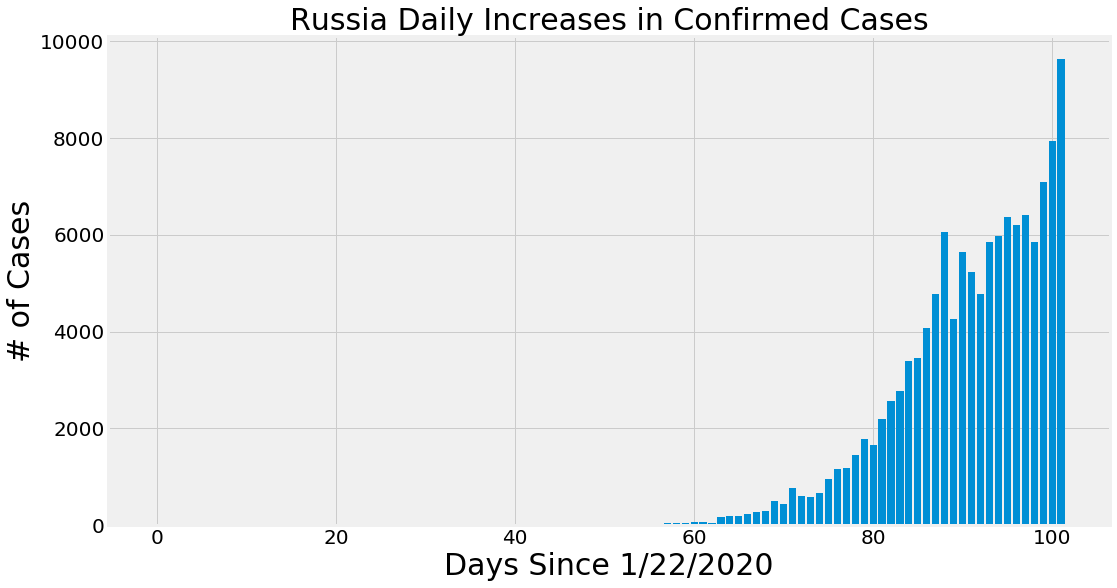

In [36]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, russia_daily_increase)
plt.title('Russia Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

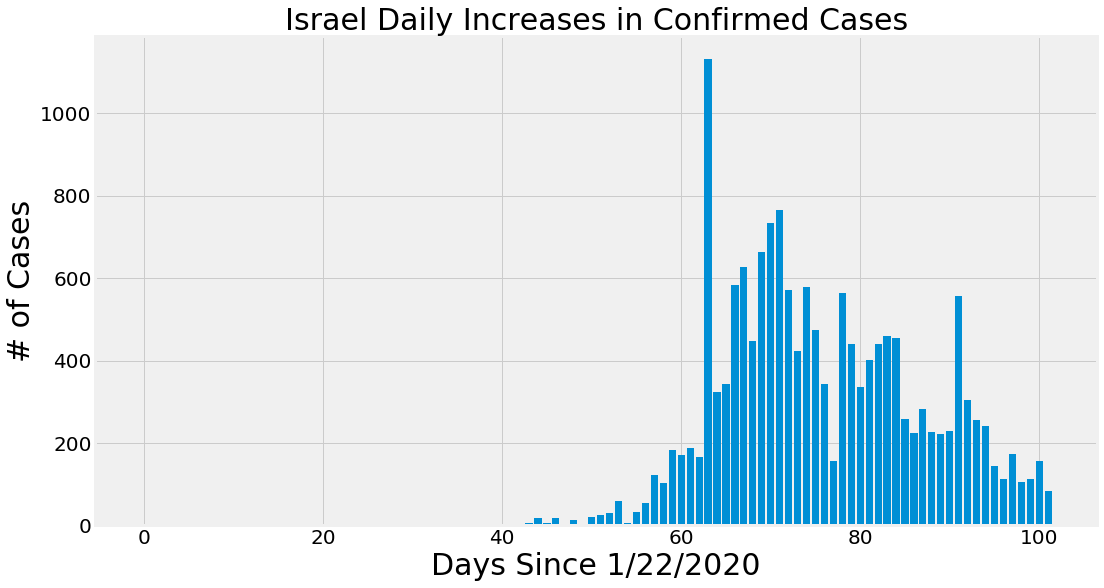

In [37]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, israel_daily_increase)
plt.title('Israel Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

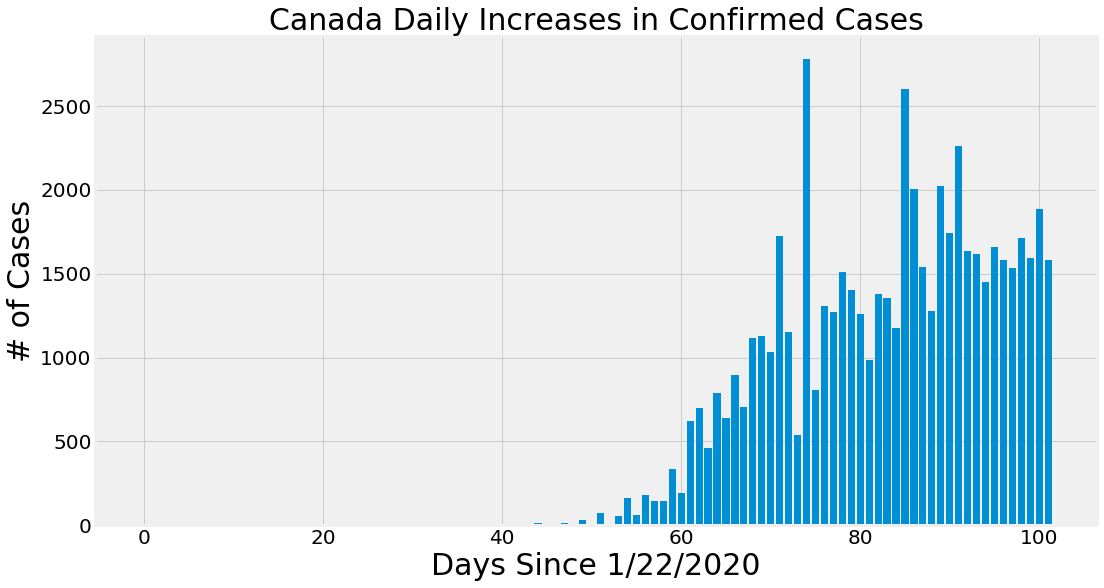

In [38]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, canada_daily_increase)
plt.title('Canada Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

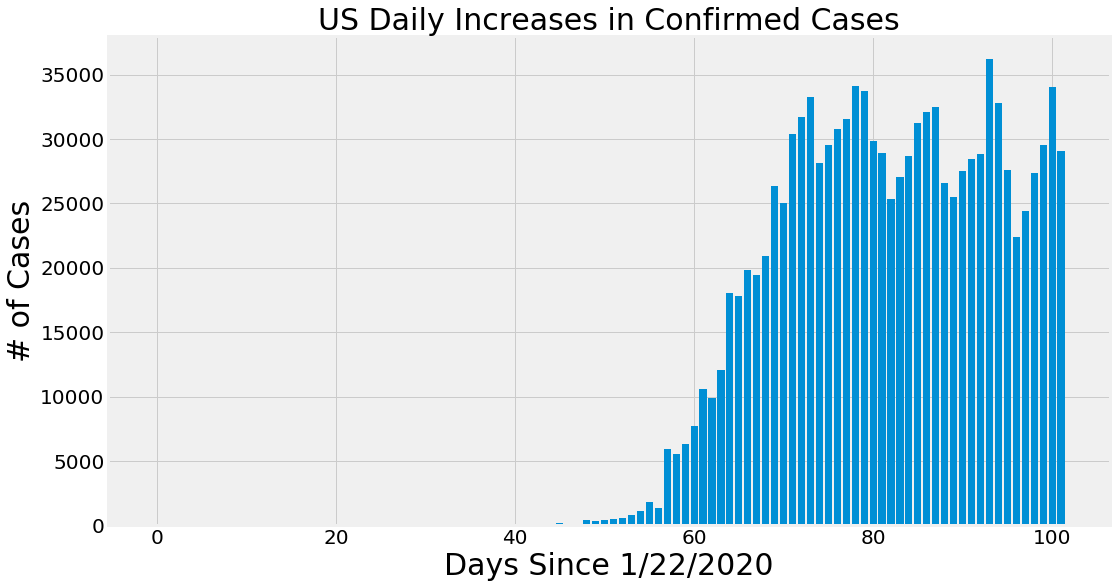

In [39]:

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

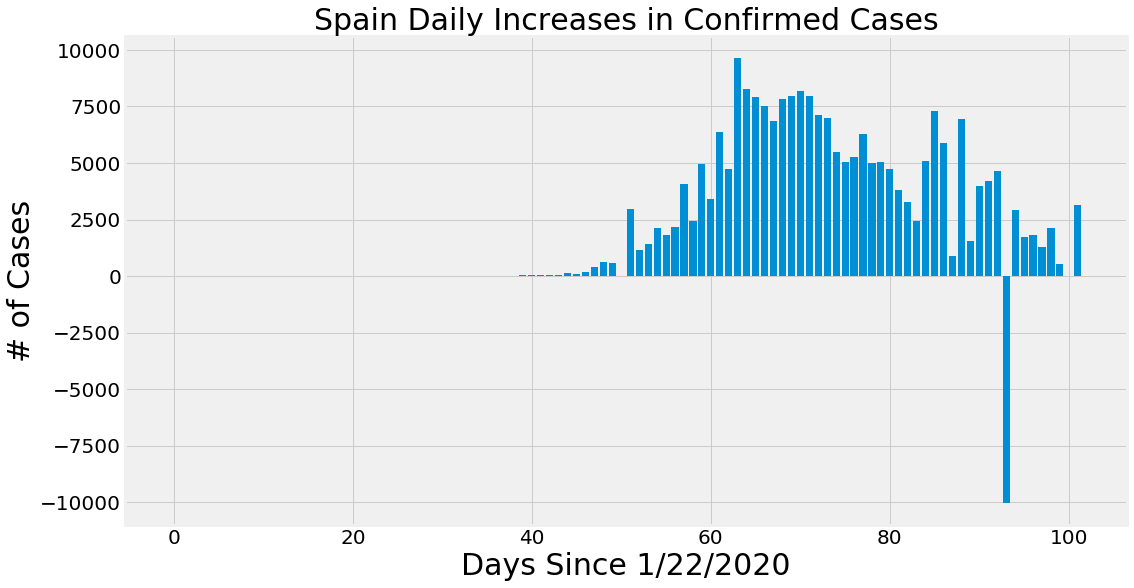

In [40]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

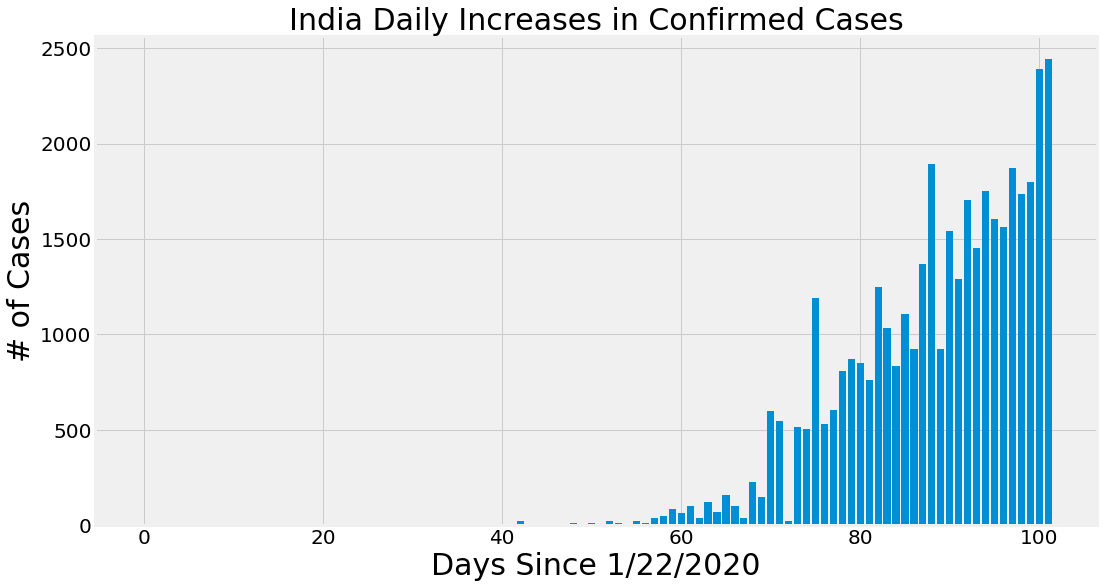

In [41]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

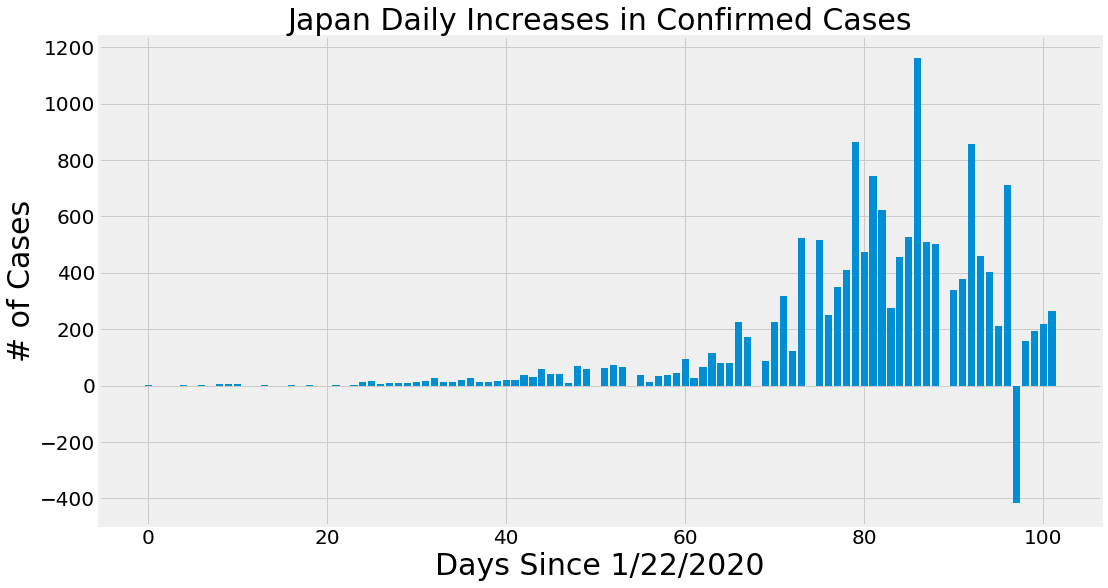

In [42]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, japan_daily_increase)
plt.title('Japan Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [43]:
#FORECAST

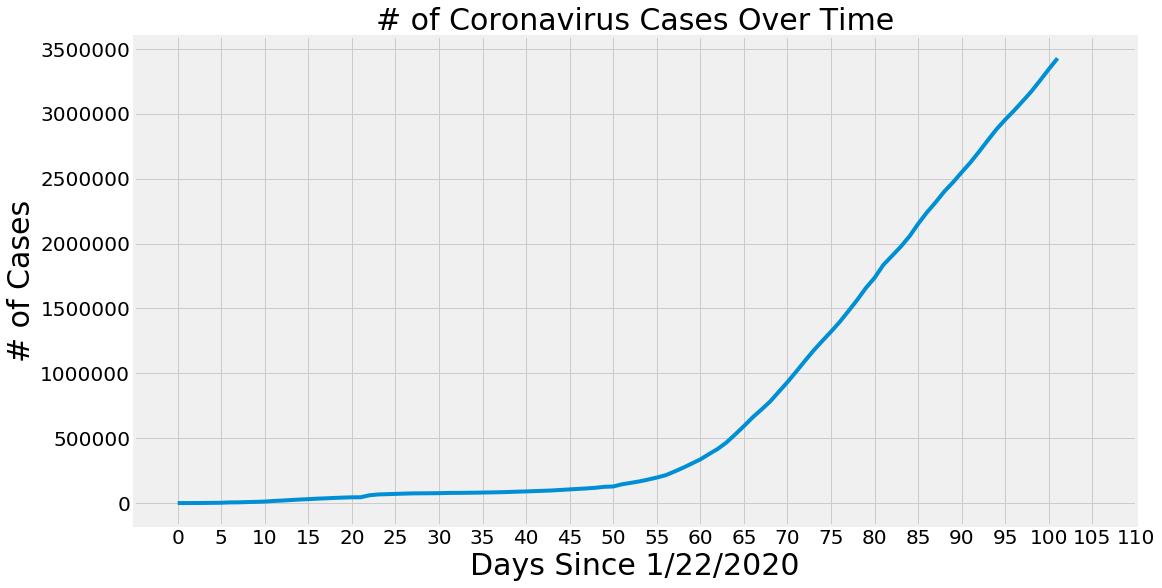

In [44]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
#plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
#plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(future_forcast)+1, 5))
plt.show()

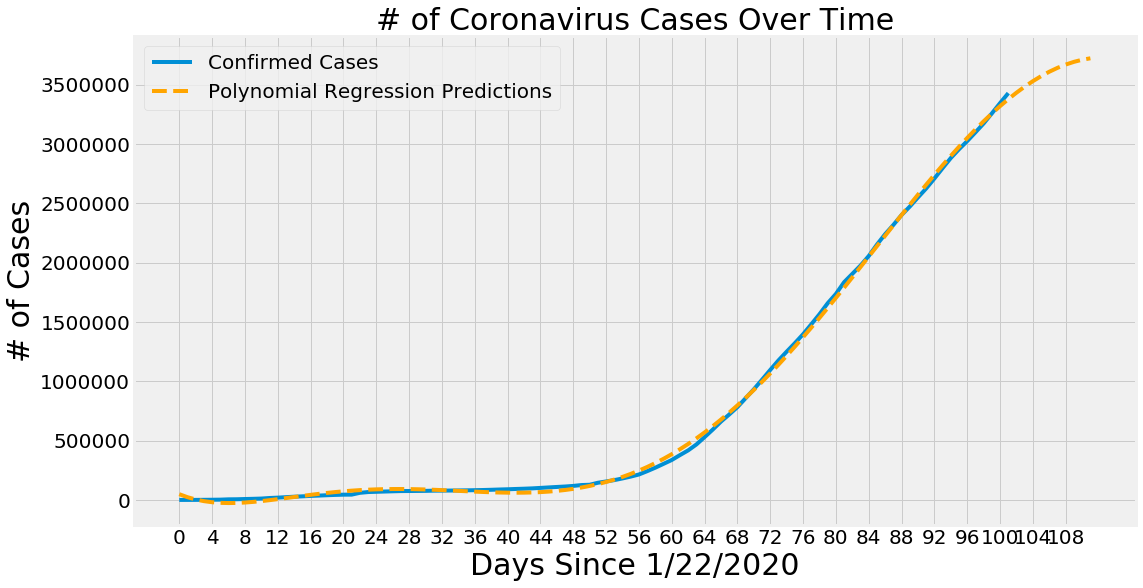

In [45]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(future_forcast)+1, 4))
plt.show()

In [46]:

# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('06/03/2020', 3431393.0),
 ('06/04/2020', 3482047.0),
 ('06/05/2020', 3528468.0),
 ('06/06/2020', 3570468.0),
 ('06/07/2020', 3607872.0),
 ('06/08/2020', 3640519.0),
 ('06/09/2020', 3668261.0),
 ('06/10/2020', 3690965.0),
 ('06/11/2020', 3708519.0),
 ('06/12/2020', 3720824.0)}

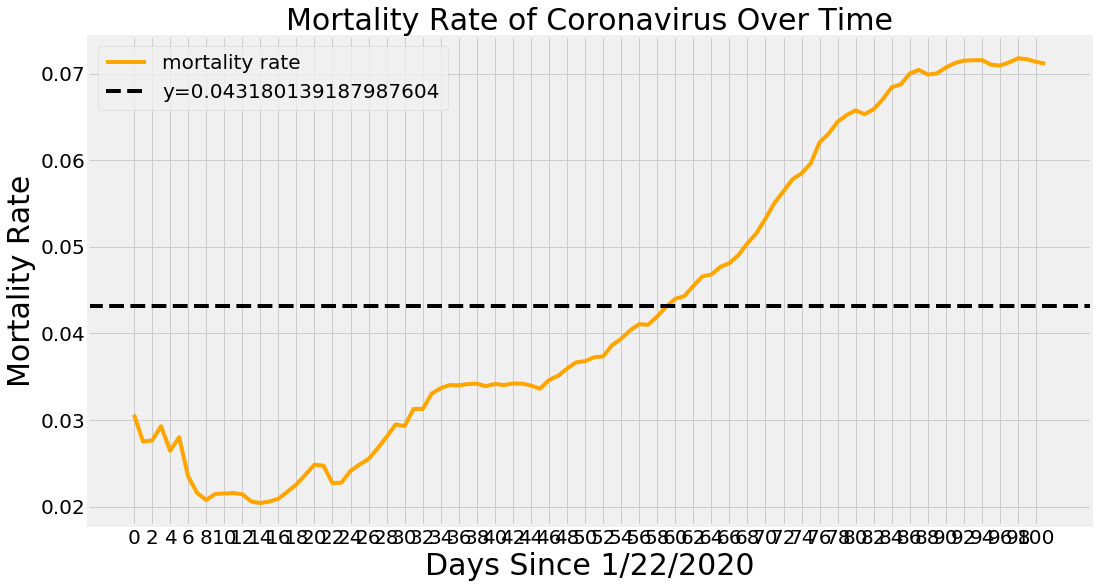

In [47]:

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(adjusted_dates)+1, 2))
plt.show()

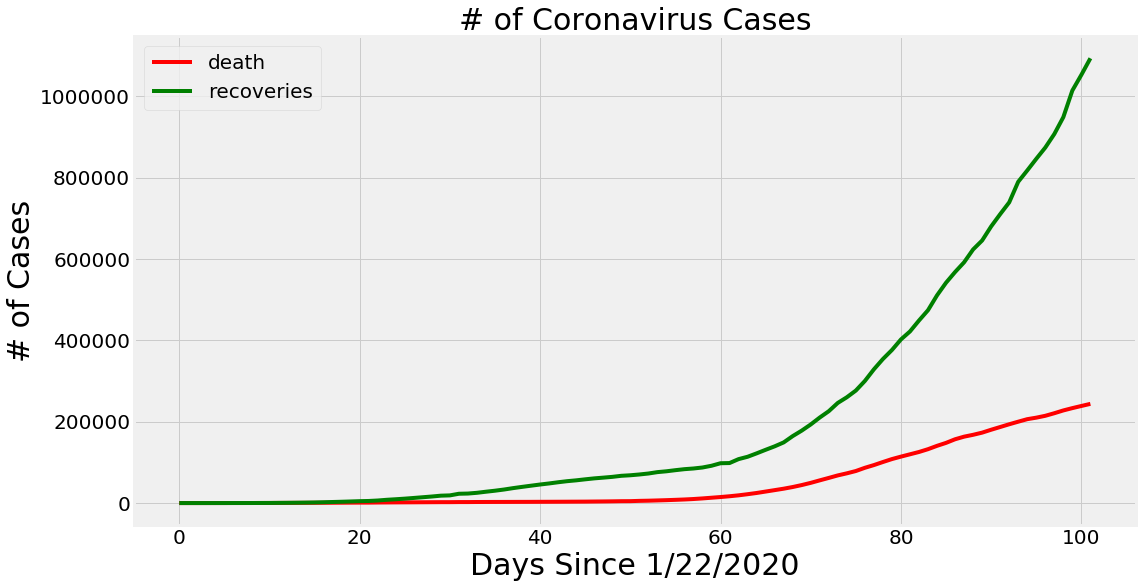

In [48]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

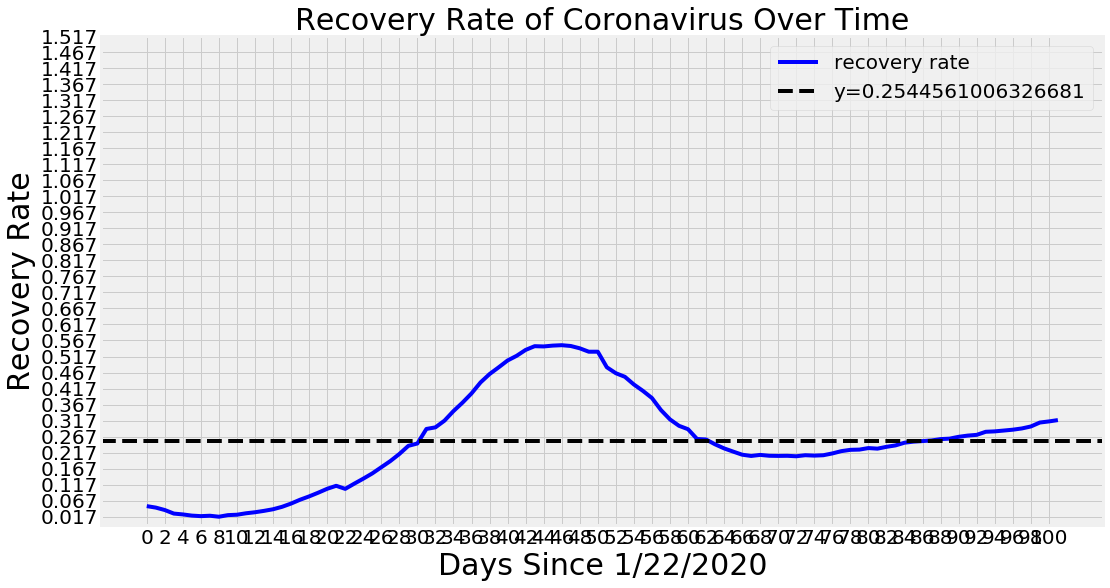

In [49]:

mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(adjusted_dates)+1, 2))
plt.yticks(np.arange(min(recovery_rate), max(recovery_rate)+1, 0.05))
plt.show()

india_daily_increase


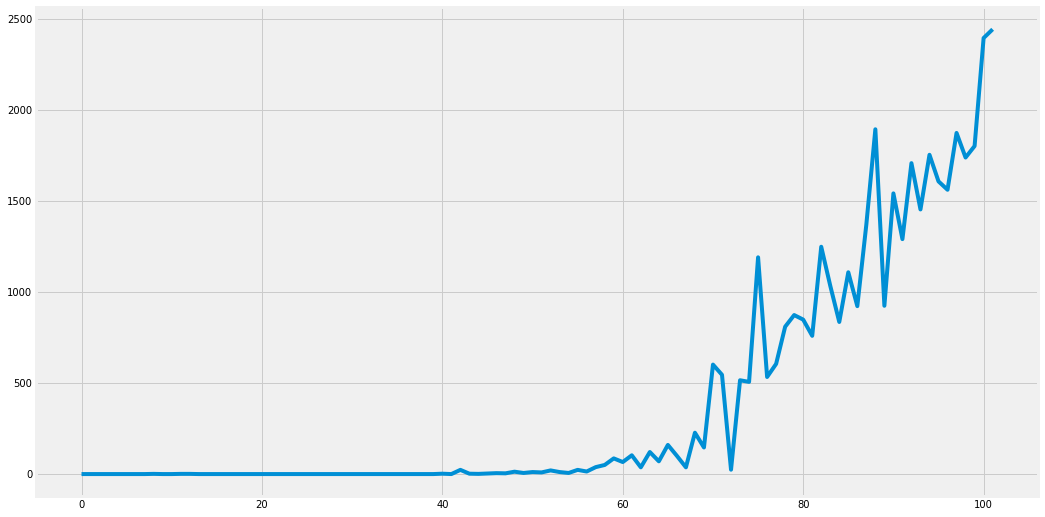

japan_daily_increase


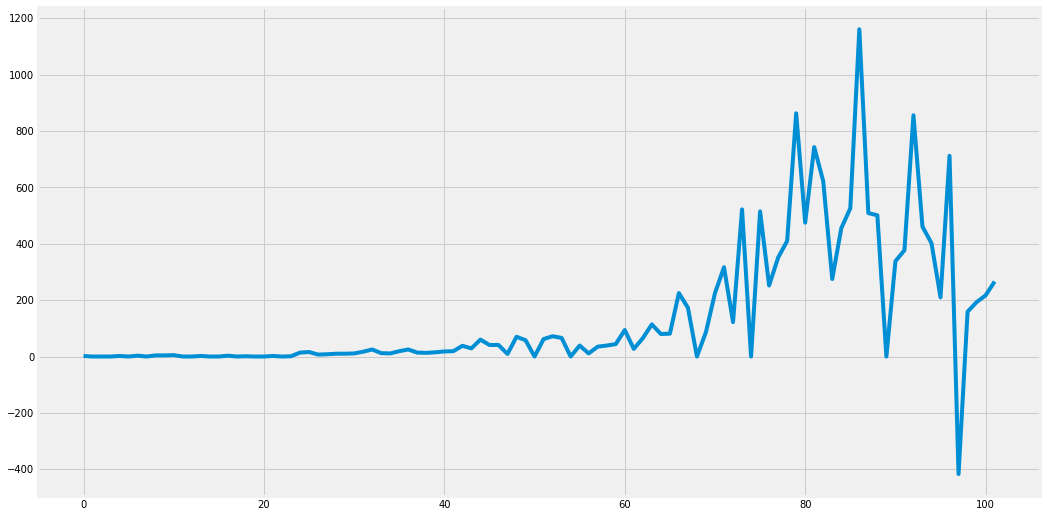

korea_daily_increase


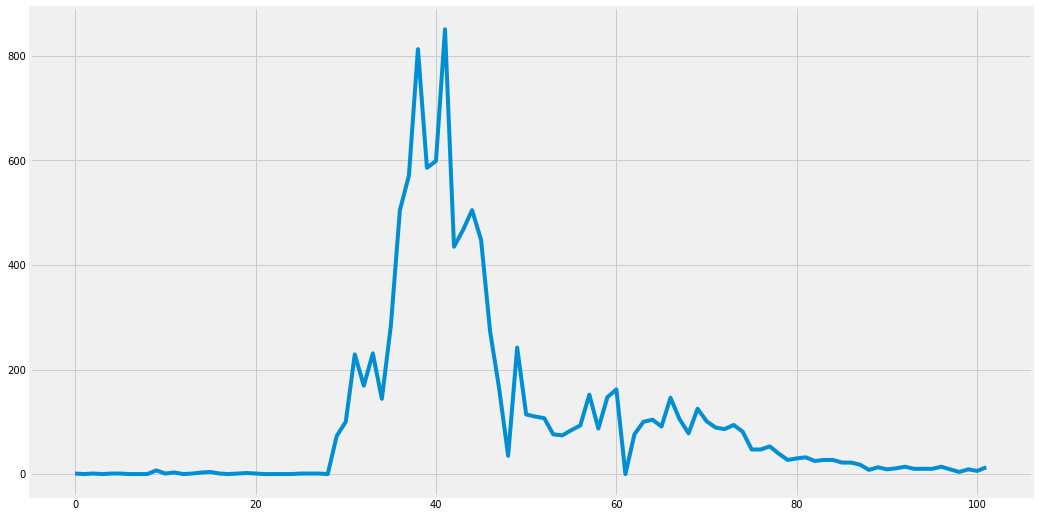

canada_daily_increase


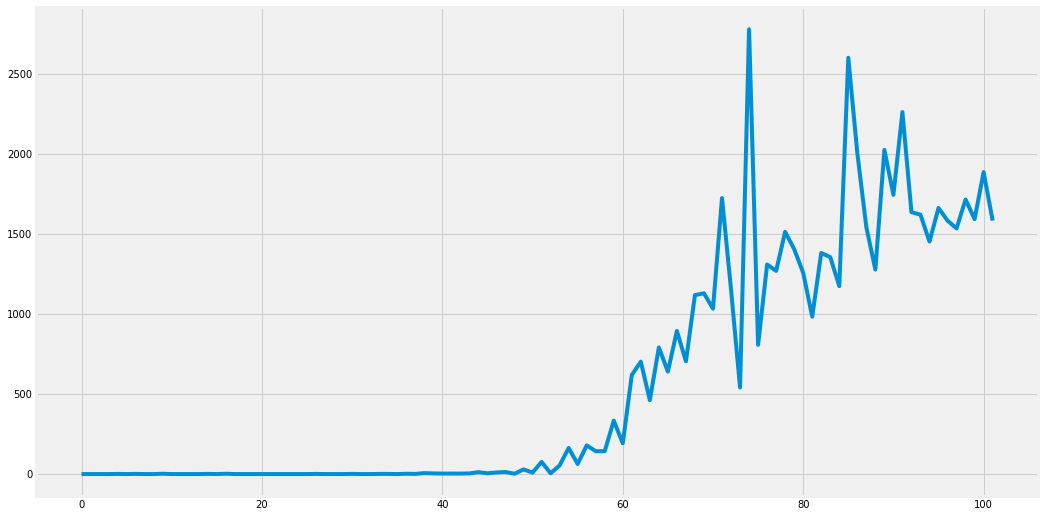

israel_daily_increase


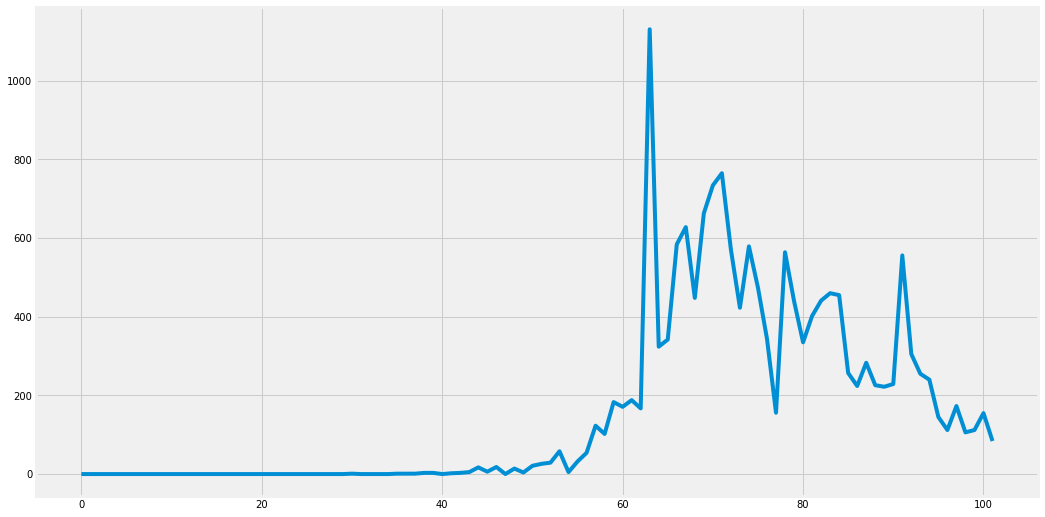

russia_daily_increase


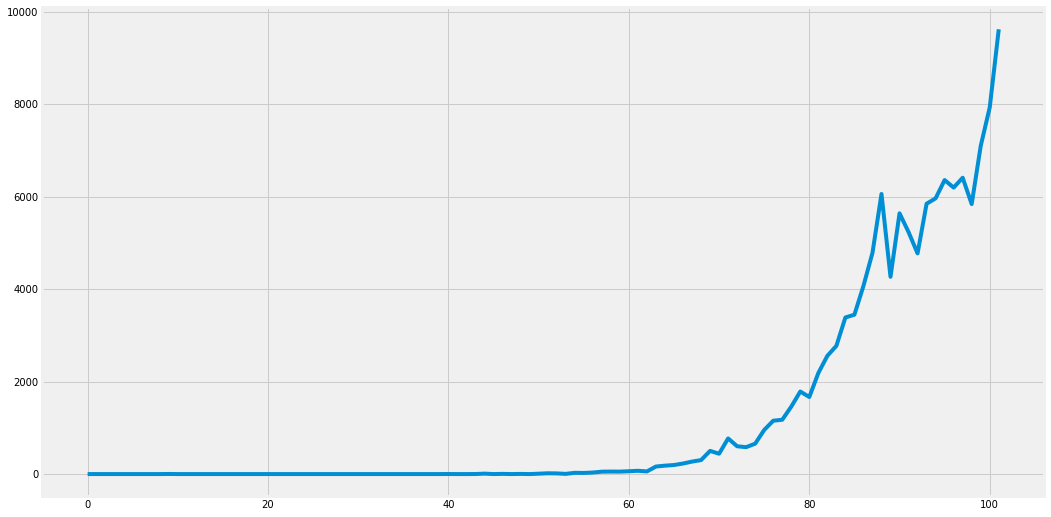

[]

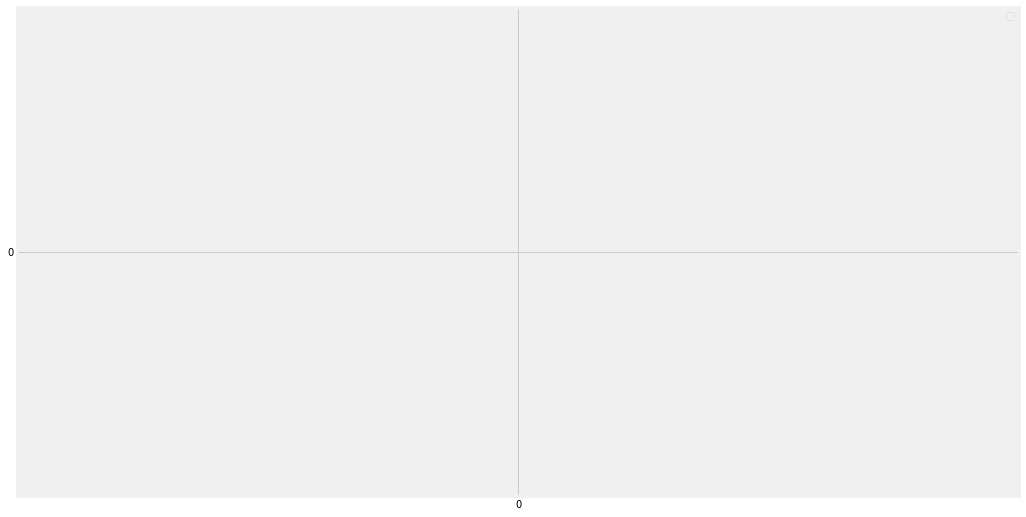

In [50]:
plt.plot(india_daily_increase)
print('india_daily_increase')
plt.show()
plt.plot(japan_daily_increase)
print('japan_daily_increase')
plt.show()
plt.plot(korea_daily_increase)
print('korea_daily_increase')
plt.show()
plt.plot(canada_daily_increase)
print('canada_daily_increase')
plt.show()
#f1 = plt.figure()
plt.plot(israel_daily_increase)
print('israel_daily_increase')
plt.show()
plt.plot(russia_daily_increase)
print('russia_daily_increase')
plt.show()
plt.legend(['india_daily_increase','japan_daily_increase','korea_daily_increase','canada_daily_increase','israel_daily_increase','russia_daily_increase'])
plt.yticks(np.arange(0, 1000, 20))
plt.xticks(np.arange(0, len(world_cases)+1, 2))
plt.plot(subplots=True)
